In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
water = pd.read_csv('C:\\Users\\koves\\Desktop\\Magistratura\\Python\\water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<Axes: xlabel='hardness', ylabel='mortality'>

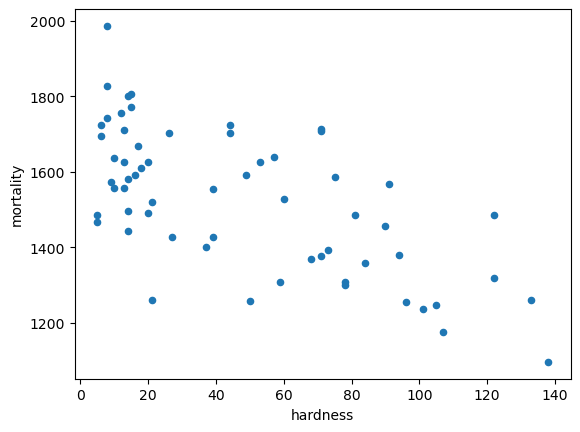

In [51]:
#1.Построить точечный график
water.plot(kind = 'scatter', x='hardness',y='mortality')

In [52]:
#2.Рассчитать коэффиценты корреляции Пирсона и Спирмена
water[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [53]:
water[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [55]:
#3.Построить модель линейной регрессии
x = water[['hardness']]
y = water[['mortality']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [56]:
model.coef_

array([[-3.00221254]])

In [57]:
model.intercept_

array([1666.21063448])

In [62]:
#4.Рассчитать коэффицент детерминации
model.score(x_test,y_test)

0.7188652345022102

In [63]:
#5.Вывести график остатков

In [65]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Text(0, 0.5, 'Остатки')

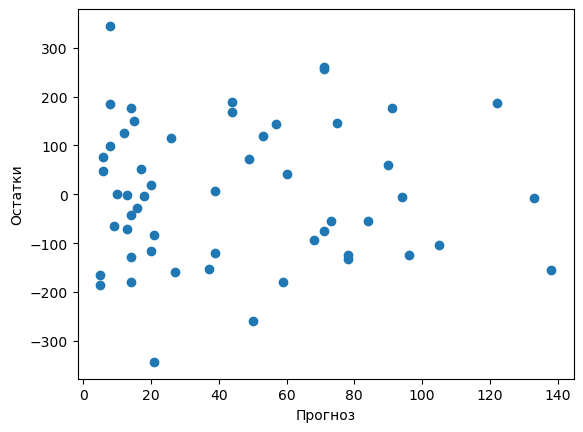

In [73]:
x_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train,x_const)
results = model_sm.fit()
plt.scatter(x=x_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([1., 0., 1., 0., 3., 4., 7., 4., 4., 6., 2., 4., 3., 3., 4., 5., 0.,
        2., 0., 1.]),
 array([-343.16417112, -308.76560927, -274.36704742, -239.96848558,
        -205.56992373, -171.17136188, -136.77280003, -102.37423818,
         -67.97567633,  -33.57711449,    0.82144736,   35.22000921,
          69.61857106,  104.01713291,  138.41569476,  172.8142566 ,
         207.21281845,  241.6113803 ,  276.00994215,  310.408504  ,
         344.80706585]),
 <BarContainer object of 20 artists>)

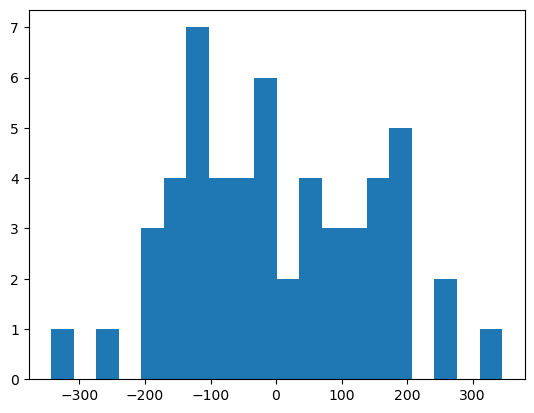

In [74]:
plt.hist(results.resid, bins=20)